# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [9]:
library('tidyverse')
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

In [10]:
wind<-read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
              show_col_types = FALSE)
head(wind)

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

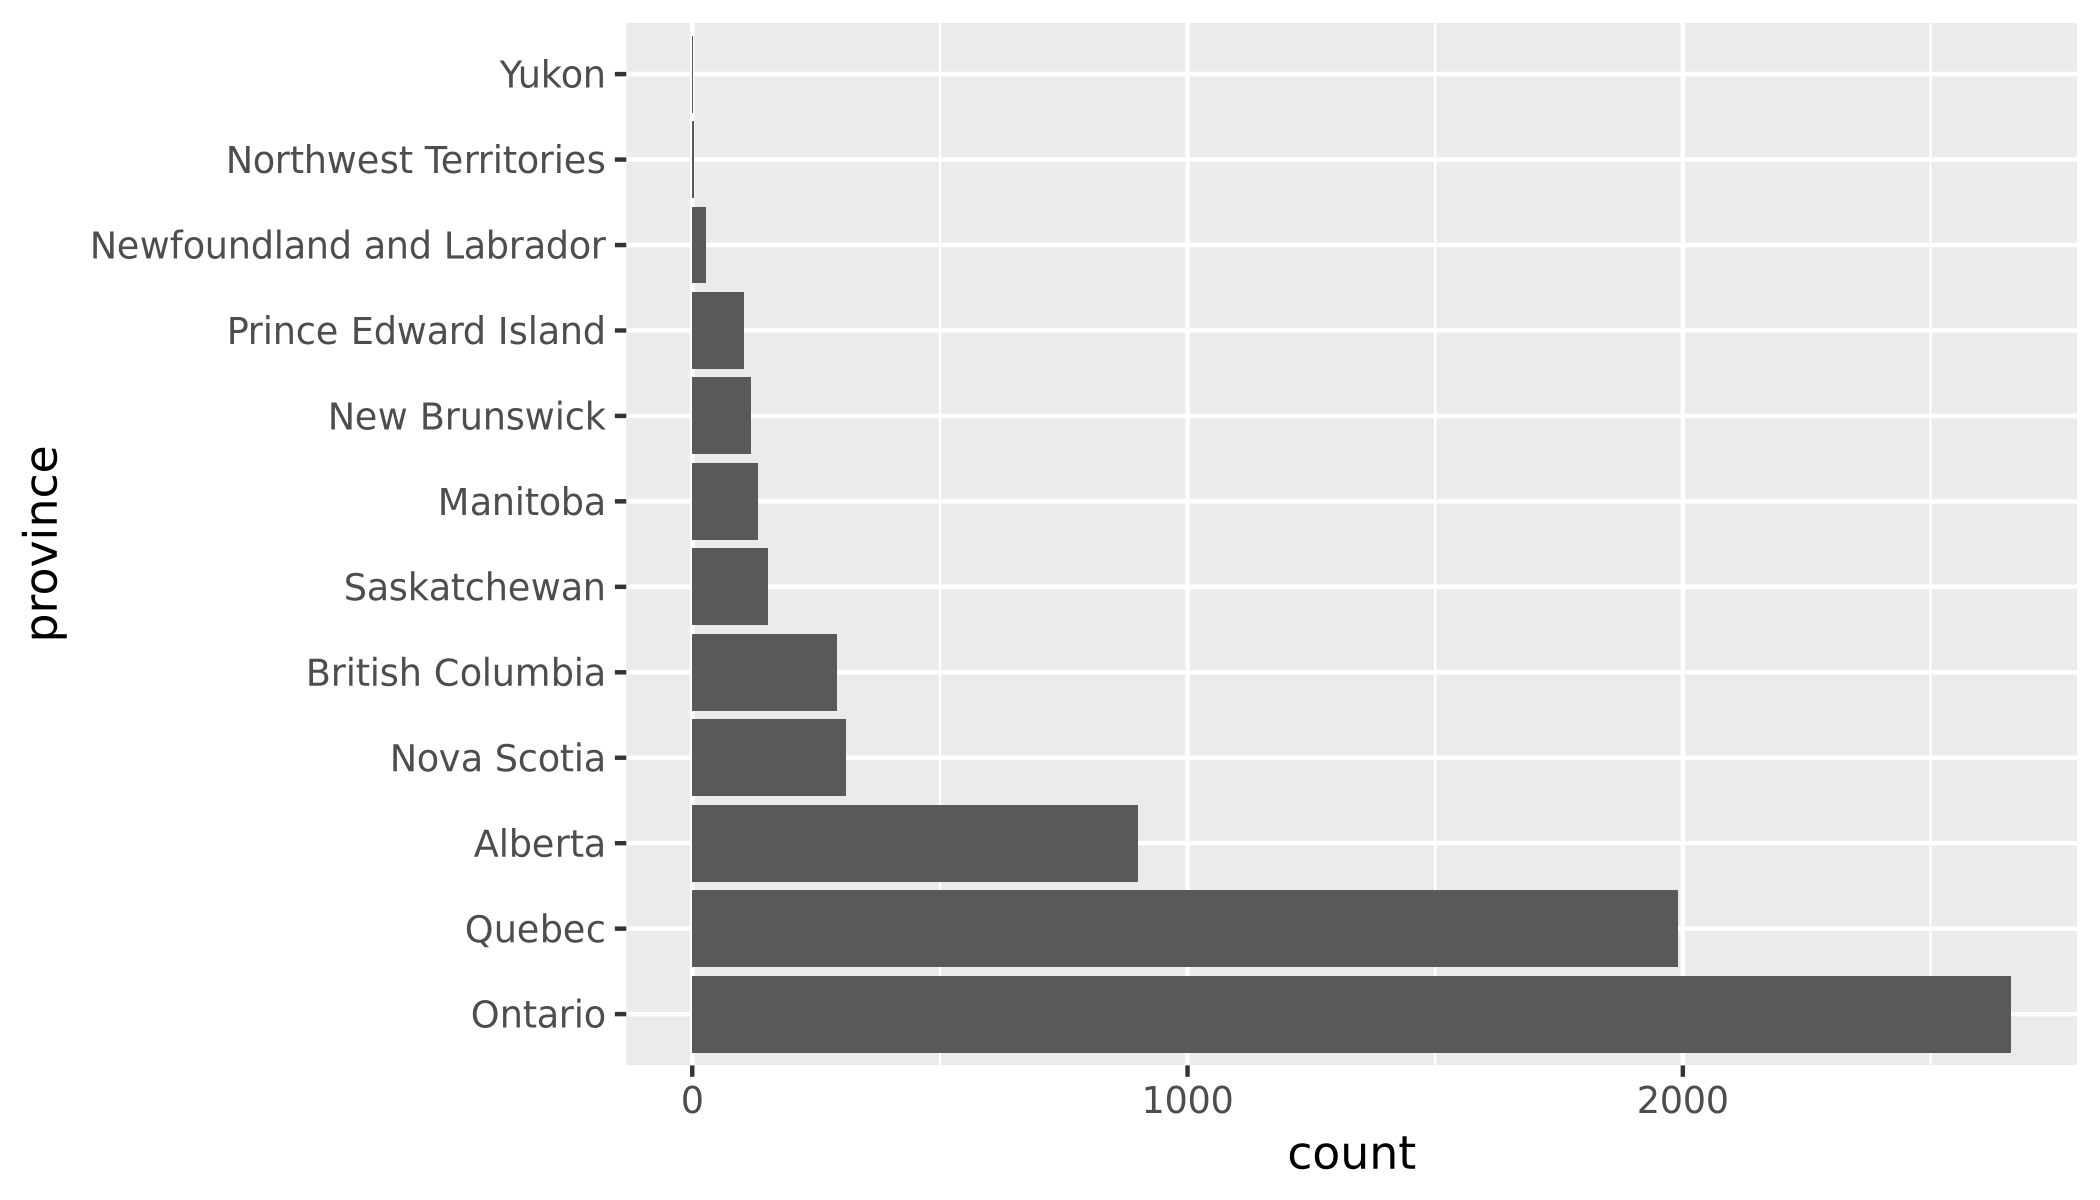

In [11]:
wind_sort<- wind|>
mutate(province=province_territory |> fct_infreq() )
ggplot(wind_sort, aes(y=province))+
geom_bar()


Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

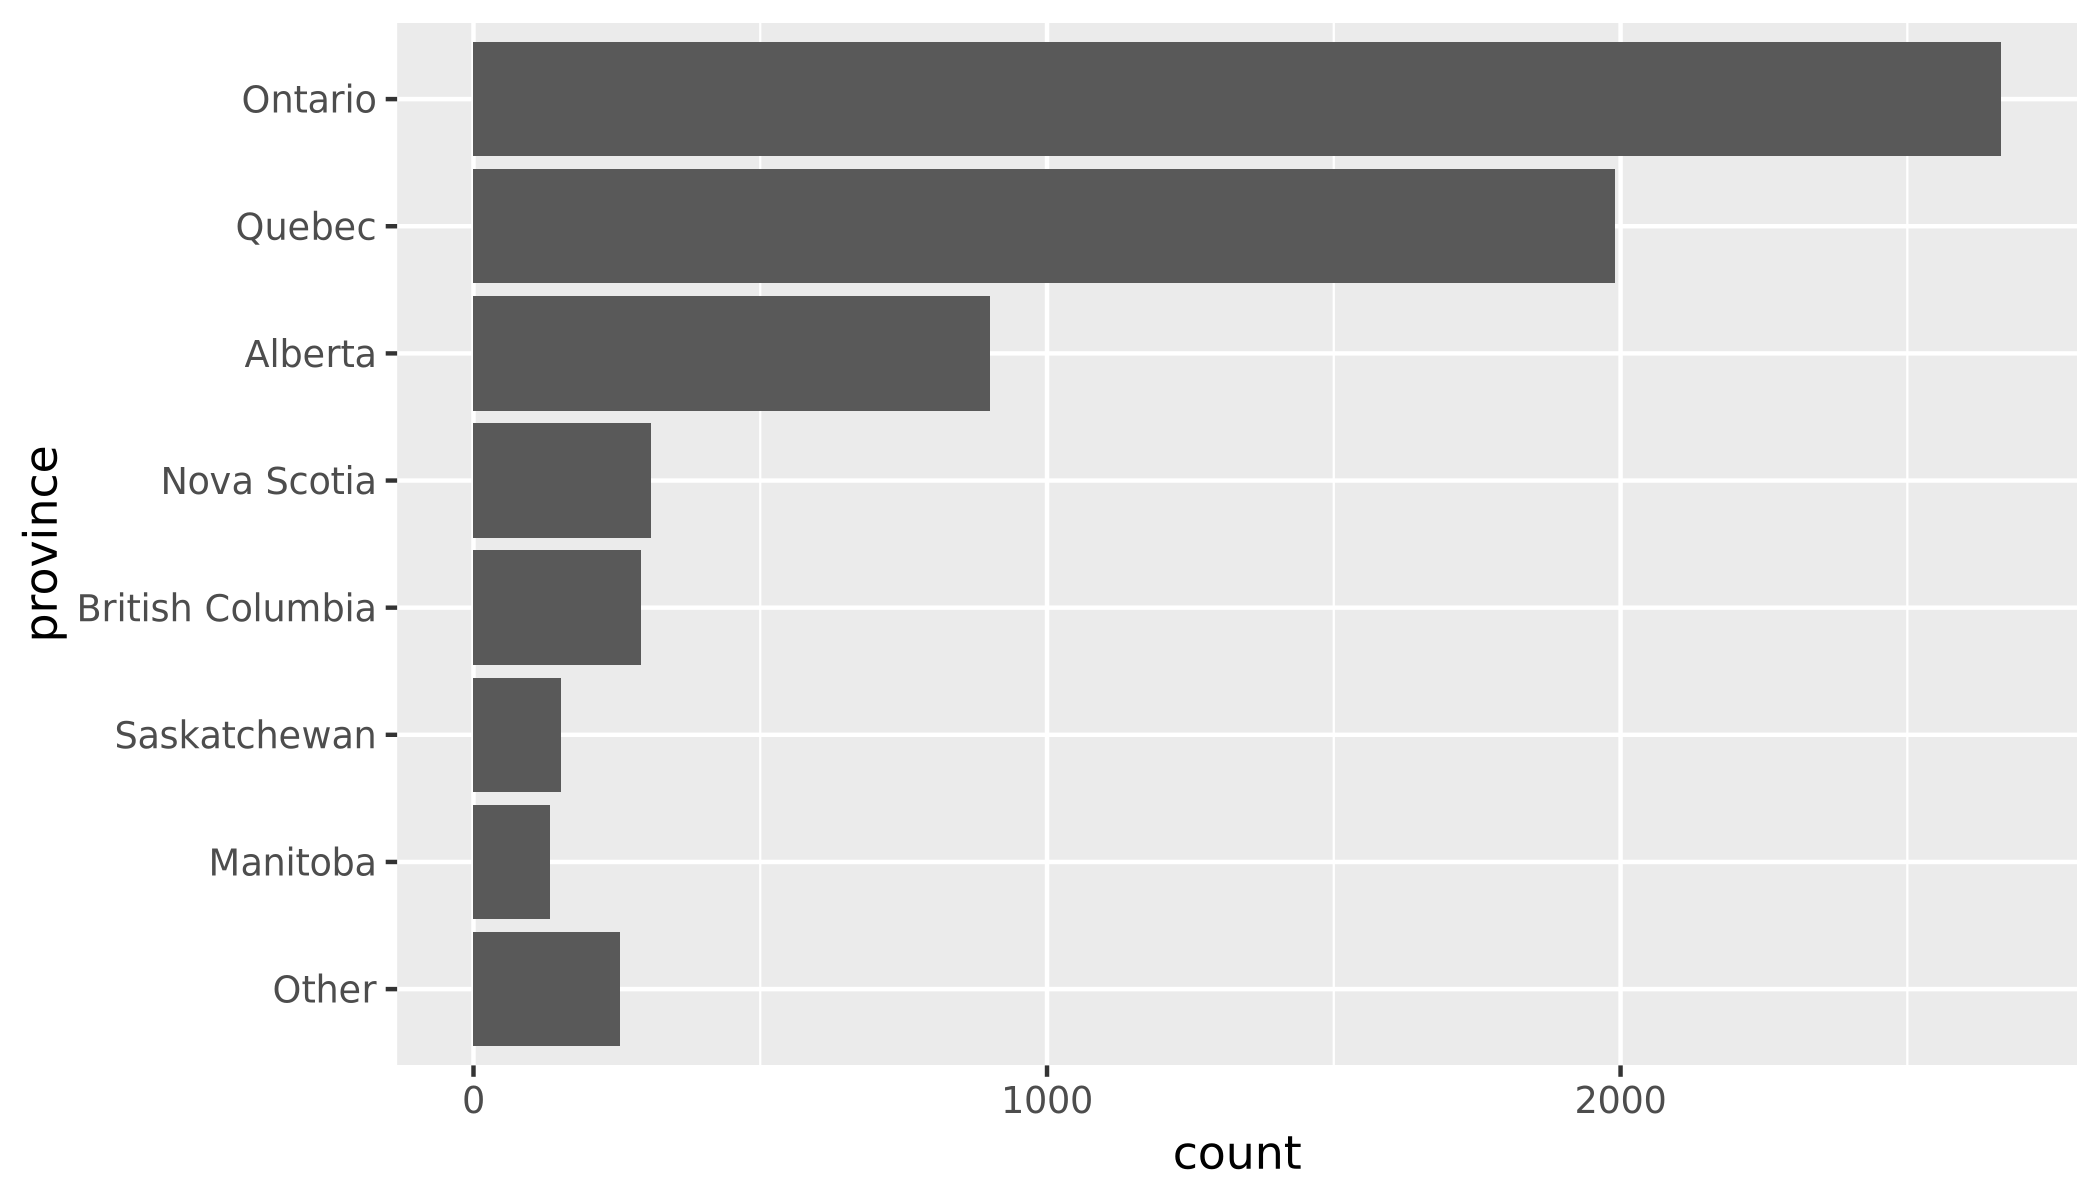

In [12]:
wind_sort<- wind|>
mutate(province=province_territory |> fct_infreq() |> fct_lump(n = 7)|>fct_rev())
ggplot(wind_sort, aes(y=province))+
geom_bar()
#geom_bar(fill='orange', data=birth_sort|>filter(province=='Alberta'))

Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [1]:
library('mapdata')

Loading required package: maps



Now we can retrieve the "data" for a map of Canada. Run this code:

In [13]:
canada = map_data('world', region='Canada')
glimpse(canada)

Rows: 11,573
Columns: 6
$ long      <dbl> -59.78760, -59.92227, -60.03775, -60.11426, -60.11748, -59.9…
$ lat       <dbl> 43.93960, 43.90391, 43.90664, 43.93911, 43.95337, 43.93960, …
$ group     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, …
$ order     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 2…
$ region    <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Canada", …
$ subregion <chr> "Sable Island", "Sable Island", "Sable Island", "Sable Islan…


Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

**They are not the same: latitude in Canada data is 'lat', longitude in Candata dataset is 'long'**



The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

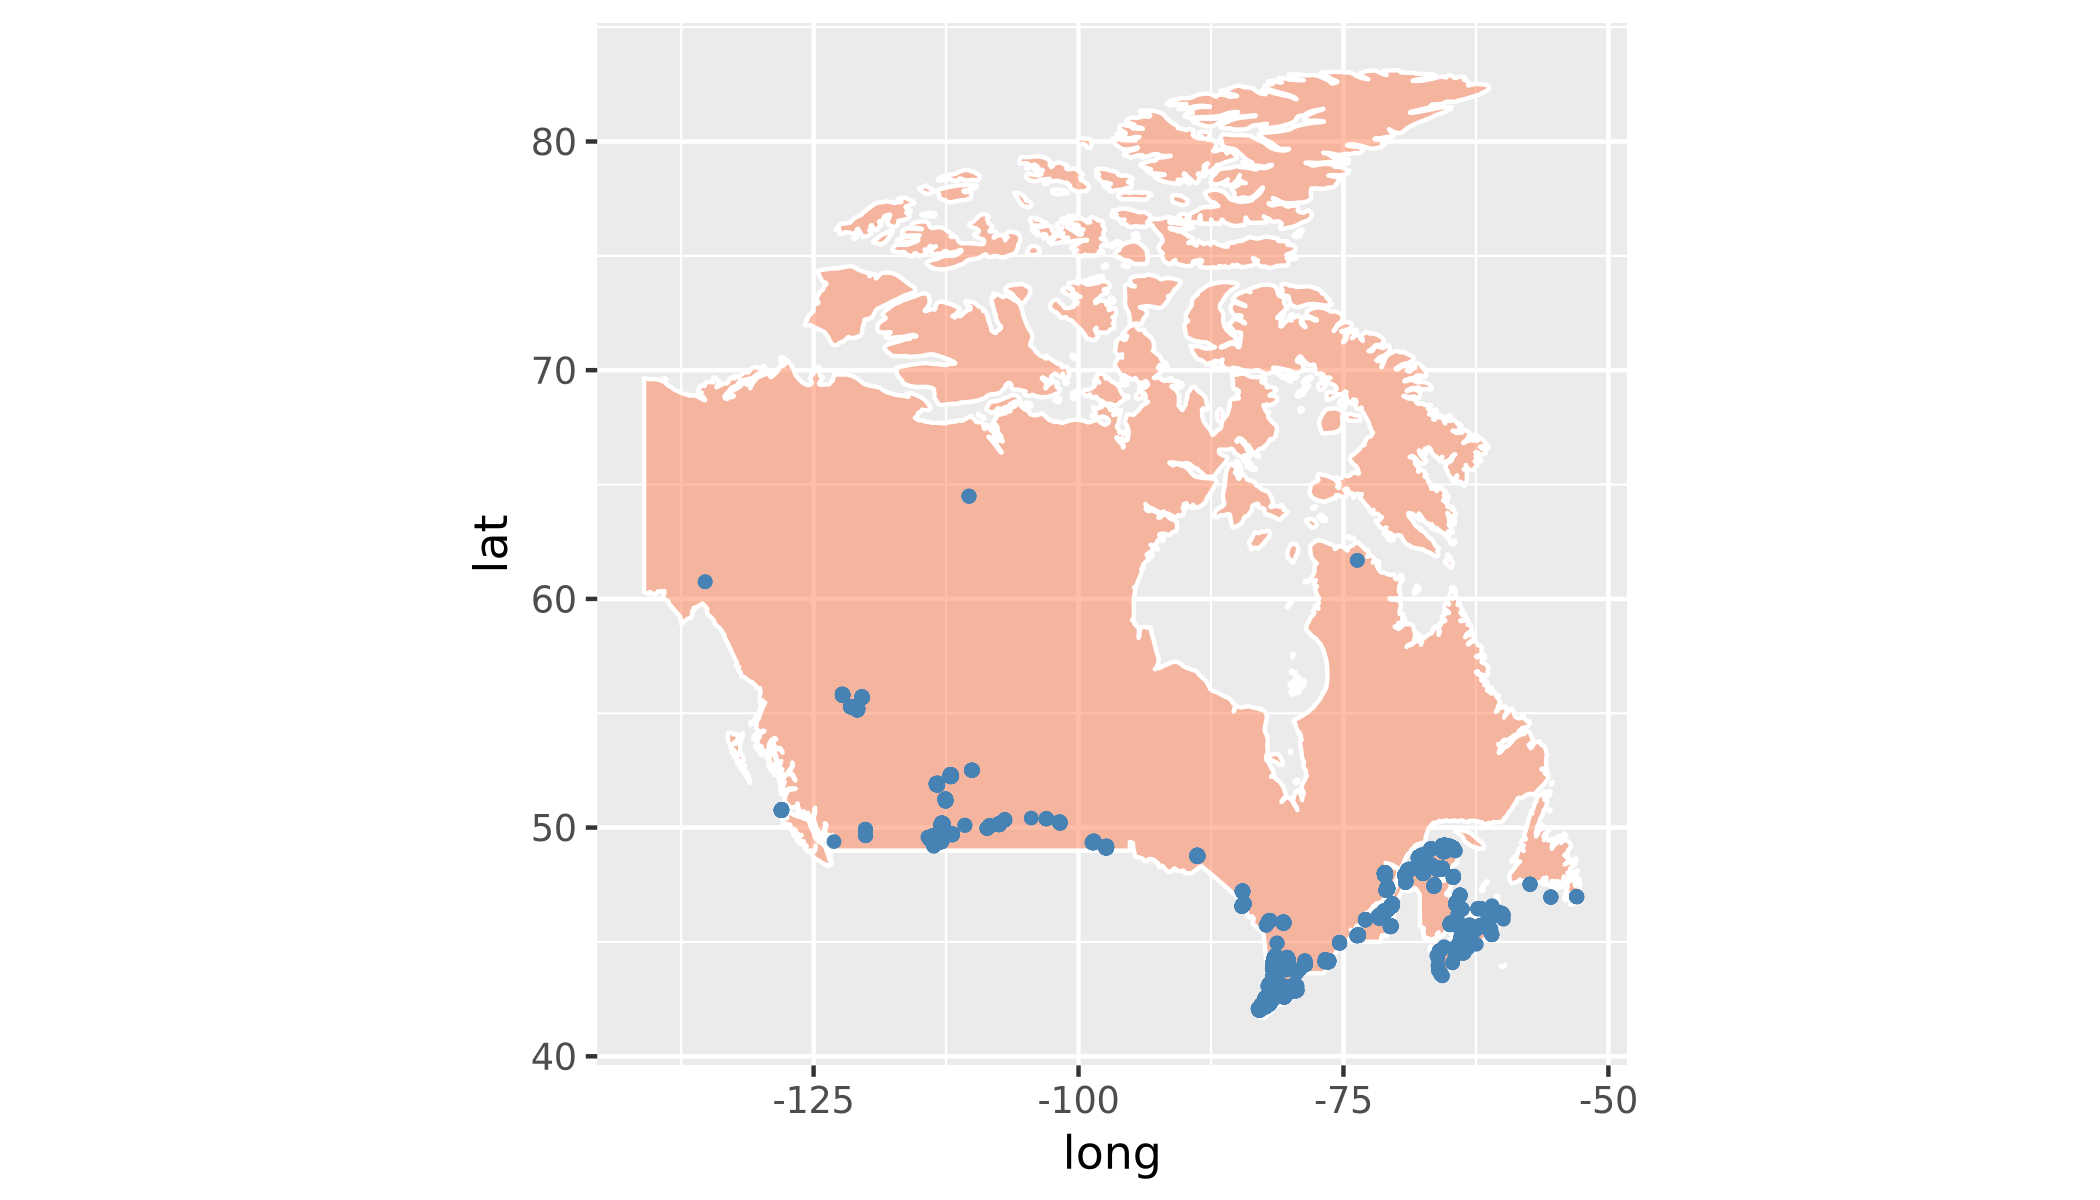

In [17]:
ggplot(data = canada) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap()+
geom_point(data=wind_sort,aes(x=longitude,y=latitude),color='steelblue',size=1)